In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [42]:
df = pd.read_csv('train.csv')
df.head(30)

,id,label,tweet
0,1,1,@user when a father is disfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,1,that was fucking hot
3,4,1,that was so shitty
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams. ca...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,1,you are so boring


In [3]:
train_pos = df[df['label'] == 0]
train_neg = df[df['label'] == 1]

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

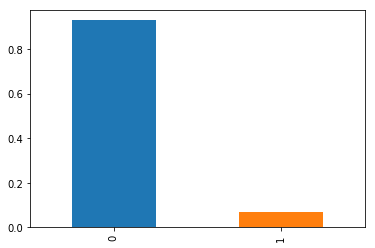

In [5]:
df['label'].value_counts(normalize = True).plot.bar()

In [6]:
import re
import nltk
from nltk.corpus import stopwords

In [7]:
def clean_tweet_words(tweet):
    alpha_only = re.sub("[^a-zA-Z]",' ',tweet) #"[^a-zA-Z]" this regex will remove any non-alphabetical char as they are not significant
    words = alpha_only.lower().split()
    stop = set(stopwords.words('english'))
    #from the dataframe we can see 'user' word is quite common in the tweets, which is basically used for tagging someone in the tweet
    #so I will be removing that
    stop.add('user')
    sig_words = [word for word in words if not word in stop]
    return(" ".join(sig_words))

In [8]:
df['clean_tweet']  = df['tweet'].apply(lambda tweet: clean_tweet_words(tweet))

df.drop('tweet',axis=1,inplace=True)


In [9]:
df.head(100)

,id,label,clean_tweet
0,1,1,father disfunctional selfish drags kids disfun...
1,2,0,thanks lyft credit use cause offer wheelchair ...
2,3,1,fucking hot
3,4,1,shitty
4,5,0,factsguide society motivation
5,6,0,huge fan fare big talking leave chaos pay disp...
6,7,0,camping tomorrow danny
7,8,0,next school year year exams think school exams...
8,9,0,love land allin cavs champions cleveland cleve...
9,10,1,boring


In [12]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, disfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, use, cause, offer, whee...
2                                       [fucking, hot]
3                                             [shitty]
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [13]:
freq = pd.Series(' '.join(df['clean_tweet']).split()).value_counts()[:10]  ##couting common word
freq

love     2828
day      2393
amp      1777
happy    1707
u        1193
like     1180
life     1176
time     1149
today    1095
new      1003
dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.5,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((15981,), (15981,), (15981,), (15981,))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc', LinearSVC(random_state=0,max_iter=5000))])
nb_pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb', MultinomialNB())])

In [ ]:
svc_pipe.fit(X_train,Y_train)
nb_pipe.fit(X_train,Y_train)

In [ ]:
pred_svc = svc_pipe.predict(X_train)
pred_nb = nb_pipe.predict(X_train)
#pred_svc

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
print('SVC')
print(accuracy_score(Y_train,pred_svc))
print('\n')
print(confusion_matrix(Y_train,pred_svc))
print('\n')

In [ ]:
print('Naive Bayes Classifier')
print(accuracy_score(Y_train,pred_nb))
print('\n')
print(confusion_matrix(Y_train,pred_nb))
print('\n')

In [ ]:
svc_pipe.fit(X_test,Y_test)
nb_pipe.fit(X_test,Y_test)

In [ ]:
pred_svc = svc_pipe.predict(X_test)
pred_nb = nb_pipe.predict(X_test)

In [ ]:
print('SVC')
print(accuracy_score(Y_test,pred_svc))
print('\n')
print(confusion_matrix(Y_test,pred_svc))
print('\n')

In [ ]:
print('Naive Bayes Classifier')
print(accuracy_score(Y_test,pred_nb))
print('\n')
print(confusion_matrix(Y_test,pred_nb))
print('\n')

In [ ]:
df.head(200)

In [16]:
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [father, disfunctional, selfish, drags, kids, ...
1    [thanks, lyft, credit, use, cause, offer, whee...
2                                       [fucking, hot]
3                                             [shitty]
4                    [factsguide, society, motivation]
Name: clean_tweet, dtype: object

In [17]:
import nltk
from nltk.stem.porter import *
stemmer=PorterStemmer()

In [19]:
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [21]:
tokenized_tweet.head()

0    [father, disfunct, selfish, drag, kid, disfunc...
1    [thank, lyft, credit, use, caus, offer, wheelc...
2                                          [fuck, hot]
3                                             [shitti]
4                          [factsguid, societi, motiv]
Name: clean_tweet, dtype: object

In [23]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])

df['clean_tweet']=tokenized_tweet

In [24]:
import sys
Y=df['label']
X=df['clean_tweet']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((22373,), (9589,), (22373,), (9589,))

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [29]:
svc_pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc', LinearSVC(random_state=0,max_iter=5000))])
nb_pipe = Pipeline([('tfidf',TfidfVectorizer()),('nb', MultinomialNB())])

In [30]:
svc_pipe.fit(X_train,Y_train)
nb_pipe.fit(X_train,Y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [31]:
pred_svc = svc_pipe.predict(X_train)
pred_nb = nb_pipe.predict(X_train)
#pred_svc

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
print('SVC')
print(accuracy_score(Y_train,pred_svc))
print('\n')
print(confusion_matrix(Y_train,pred_svc))
print('\n')

SVC
0.994055334555044


[[20748    13]
 [  120  1492]]




In [34]:
print('Naive Bayes Classifier')
print(accuracy_score(Y_train,pred_nb))
print('\n')
print(confusion_matrix(Y_train,pred_nb))
print('\n')

Naive Bayes Classifier
0.9430116658472266


[[20761     0]
 [ 1275   337]]




In [35]:
svc_pipe.fit(X_test,Y_test)
nb_pipe.fit(X_test,Y_test)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [36]:
pred_svc = svc_pipe.predict(X_test)
pred_nb = nb_pipe.predict(X_test)

In [37]:
print('SVC')
print(accuracy_score(Y_test,pred_svc))
print('\n')
print(confusion_matrix(Y_test,pred_svc))
print('\n')

SVC
0.9970799874856606


[[8950    2]
 [  26  611]]




In [38]:
print('Naive Bayes Classifier')
print(accuracy_score(Y_test,pred_nb))
print('\n')
print(confusion_matrix(Y_test,pred_nb))
print('\n')

Naive Bayes Classifier
0.9402440296172698


[[8952    0]
 [ 573   64]]


